# Thực nghiệm 1:
- Giữ nguyên cabin nạp dữ liệu thiếu theo trung vị của Pclass.
- Tạo thuộc tính title cho chức vụ của từng mẫu bằng trích xuất chuỗi tên.

## **Xử lý dữ liệu bị thiếu và Feature engineering**

### **Feature Engineering cho biến Name**
- One hot


#### 

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
train_test_data = [df,df_test]

for ds in train_test_data:
    ds['Title'] = ds['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [ ]:
df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [ ]:
df[['Name','Title']].head(5)

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [ ]:
mapping_title = {"Mr":0,"Miss":1,"Mrs":2,
                 "Master":3,"Dr":3,"Rev":3,"Col":3,"Mlle":3,"Major":3,
                 "Ms":3,"Mme":3,"Don":3,"Lady":3,"Sir":3,"Dona" : 3, "Capt":3,"Countess":3,"Jonkheer":3}

for ds in train_test_data:
    ds['Title'] = ds["Title"].map(mapping_title)


In [ ]:
df[['Name','Title']].head(10)

,Name,Title
0,"Braund, Mr. Owen Harris",0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2
2,"Heikkinen, Miss. Laina",1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2
4,"Allen, Mr. William Henry",0
5,"Moran, Mr. James",0
6,"McCarthy, Mr. Timothy J",0
7,"Palsson, Master. Gosta Leonard",3
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2
9,"Nasser, Mrs. Nicholas (Adele Achem)",2


In [ ]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
Title            0
dtype: int64

Title,1,2,0,3
Sống sót,127,99,81,35
Tử vong,55,26,436,32


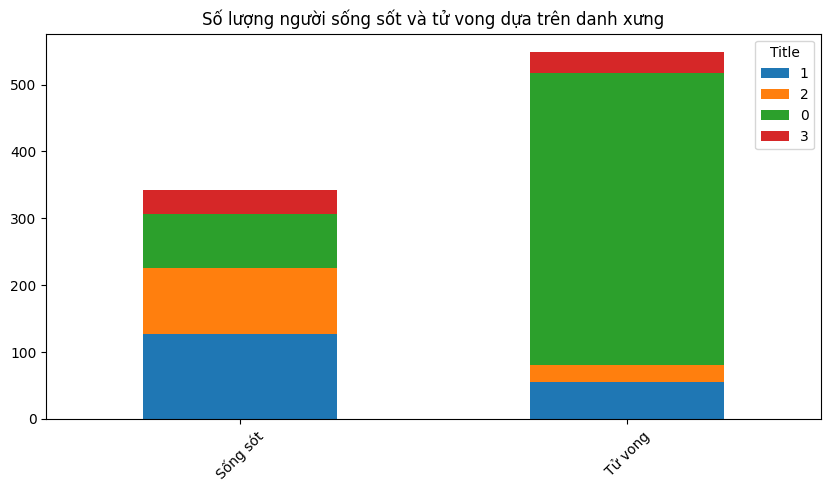

In [ ]:
bar_chart('Title','Số lượng người sống sốt và tử vong dựa trên danh xưng')

**Xóa các cột dữ liệu không cần thiết**

In [ ]:
df.drop('Name',axis=1,inplace=True)
df_test.drop('Name',axis=1,inplace=True)

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,2


### **Feature Engineering cho biến Sex**

In [ ]:
mapping_gender = {"male":0,"female":1}
for ds in train_test_data:
    ds['Sex'] = ds['Sex'].map(mapping_gender)

Sex,1,0
Sống sót,233,109
Tử vong,81,468


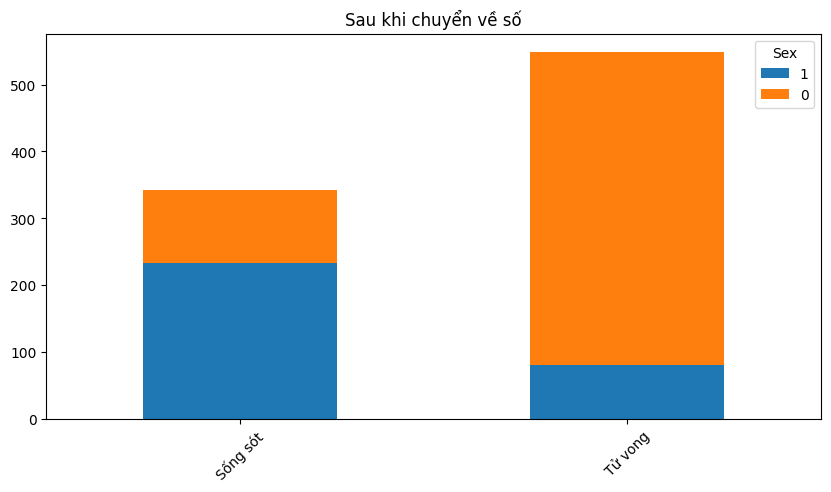

In [ ]:
bar_chart('Sex','Sau khi chuyển về số')

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


### **fill NaN cho biến Age dựa vào danh xưng của tên**

In [ ]:
df['Age'] = df['Age'].fillna(df.groupby('Title')['Age'].transform('median'))
df_test['Age'] = df_test['Age'].fillna(df_test.groupby('Title')['Age'].transform('median'))

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


### **Feature Engineering cho biến Age** 
- Cần chỉnh cái column chart về line chart
- Có thể thử scaling và normalization thay vì mapping hoặc mapping rồi hot encoded

C:\Users\Keqing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Keqing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


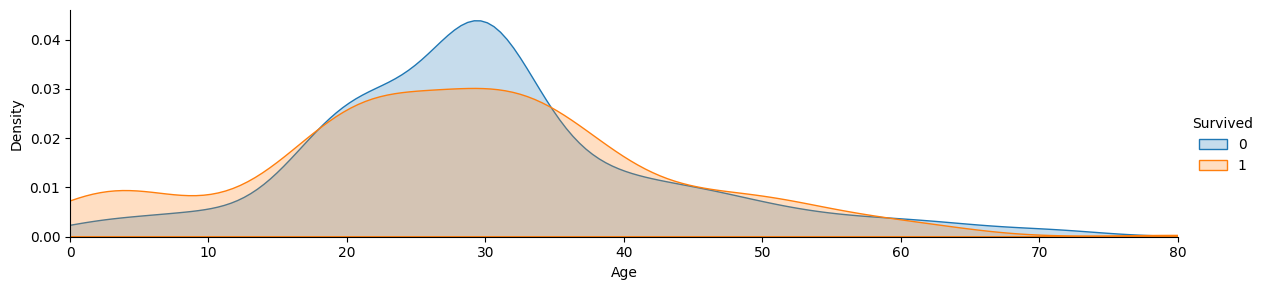

In [ ]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend() 
plt.show()

Phần lớn hành khách trên tàu Titanic thuộc nhóm tuổi từ 20 đến 30. Và điều này nghe có hơi mẫu thuẫn, nhưng cũng ở độ tuổi này cũng có tỷ lệ tử vong cao VÀ tỷ lệ sống sót cao.

**Chia tuổi thành các nhóm tuổi** (vì giá trị tuổi hiện tại là biến liên tục có giá trị khác nhau. Khi trực quan hóa, việc đếm số lượng hành khách ở từng tuổi thường không hiệu quả.) VD:

Age,21.0,35.0,30.0,24.0,22.0,36.0,27.0,18.0,19.0,32.0,...,66.0,14.5,70.5,36.5,55.5,20.5,23.5,24.5,34.5,74.0
Sống sót,27.0,25.0,24.0,15.0,11.0,11.0,11.0,9.0,9.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tử vong,33.0,10.0,120.0,15.0,16.0,11.0,7.0,17.0,16.0,9.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


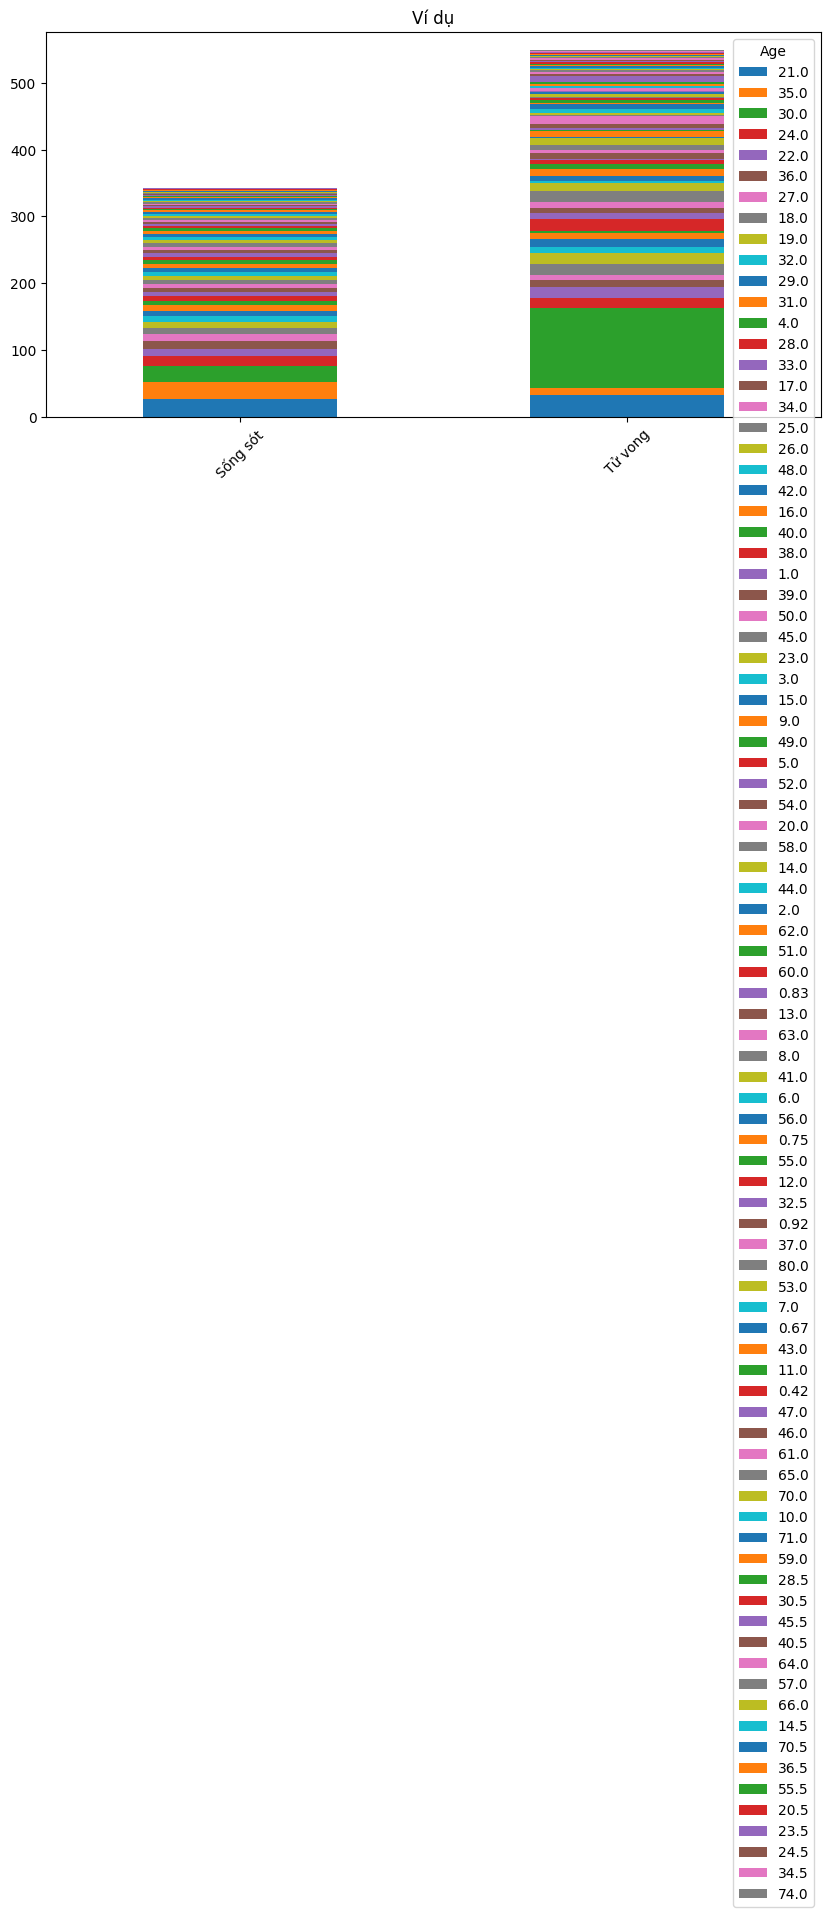

In [ ]:
bar_chart('Age','Ví dụ')

Vì vậy ta sẽ chia thành các nhóm tuổi như sau:

- trẻ em (0) : Age <= 16

- người trẻ (1) : Age = 16-26

- người lớn (2) : 26-36

- trung niên (3) : 36-62

- cao tuổi (4) : Age > 62

In [ ]:
for dataset in train_test_data:
    #Trẻ em (0) : Age <= 16
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0 
    
    #Người trẻ (1) : 16 < Age <= 26
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    
    #Người lớn (2) : 26 < Age <= 36
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    
    #Trung niên (3) : 36 < Age <= 62
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    
    #Cao tuổi (4) : Age > 62
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


Age,2.0,1.0,3.0,0.0,4.0
Sống sót,116,97,69,57,3
Tử vong,220,158,111,48,12


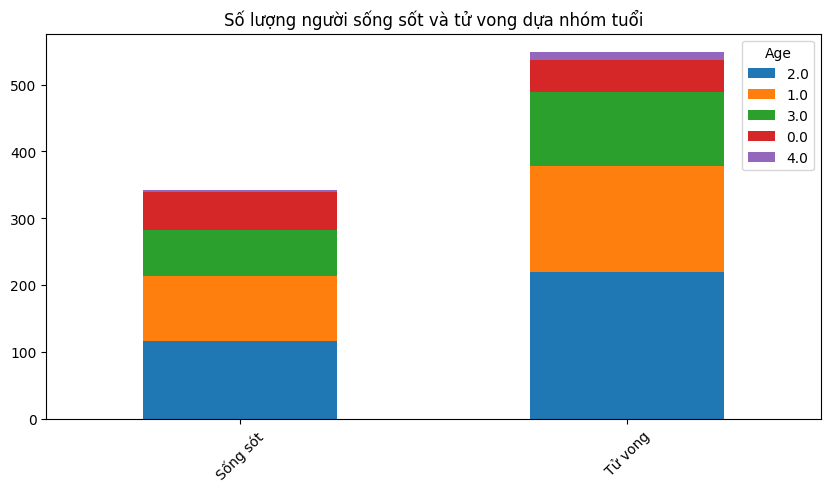

In [ ]:
bar_chart('Age','Số lượng người sống sốt và tử vong dựa nhóm tuổi')

### **Feature Engineering cho biến Embarked**
- Cần thử one-hot

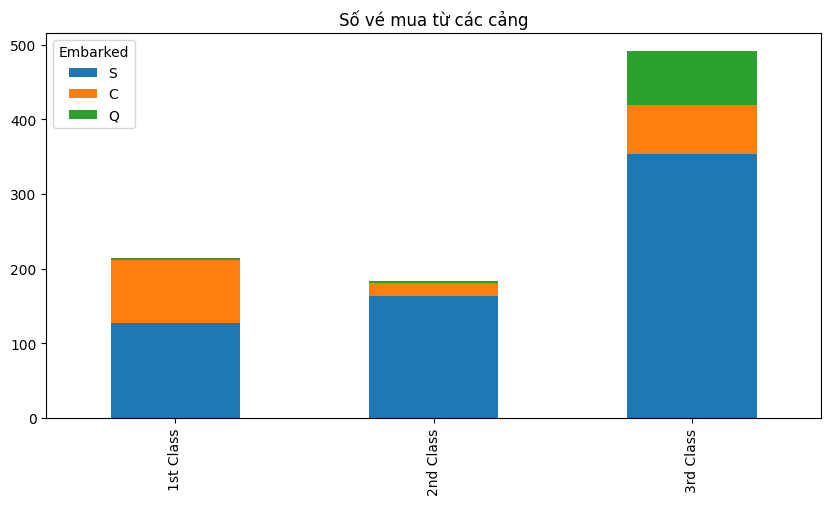

Pclass1:
 Embarked
S    127
C     85
Q      2
Name: count, dtype: int64
Pclass2:
 Embarked
S    164
C     17
Q      3
Name: count, dtype: int64
Pclass3:
 Embarked
S    353
Q     72
C     66
Name: count, dtype: int64


In [ ]:
Pclass1 = df[df['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = df[df['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = df[df['Pclass'] == 3]['Embarked'].value_counts()
temp = pd.DataFrame([Pclass1,Pclass2,Pclass3])
temp.index = ['1st Class','2nd Class','3rd Class']
temp.plot(kind = 'bar', stacked =  True, figsize=(10,5),title="Số vé mua từ các cảng")
plt.show()
print("Pclass1:\n",Pclass1)
print("Pclass2:\n",Pclass2)
print("Pclass3:\n",Pclass3)

**Hơn 50% hành khách của mỗi hạng vé (1st, 2nd, 3rd) đều lên tàu từ cảng S (Southampton).** Vì vậy các giá trị NaN của embarked sẽ thay bằng S

In [ ]:
for ds in train_test_data:
    ds['Embarked'] = ds['Embarked'].fillna('S')

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


**Chuyển các giá trị Embarked từ object về float**

In [ ]:
mapping_Embarked = {'S':0,'C':1,'Q':2}
for ds in train_test_data:
    ds['Embarked'] = ds['Embarked'].map(mapping_Embarked)

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


### **Feature Engineering cho biến Fare**
- thử one-hot và scaling với normalization.

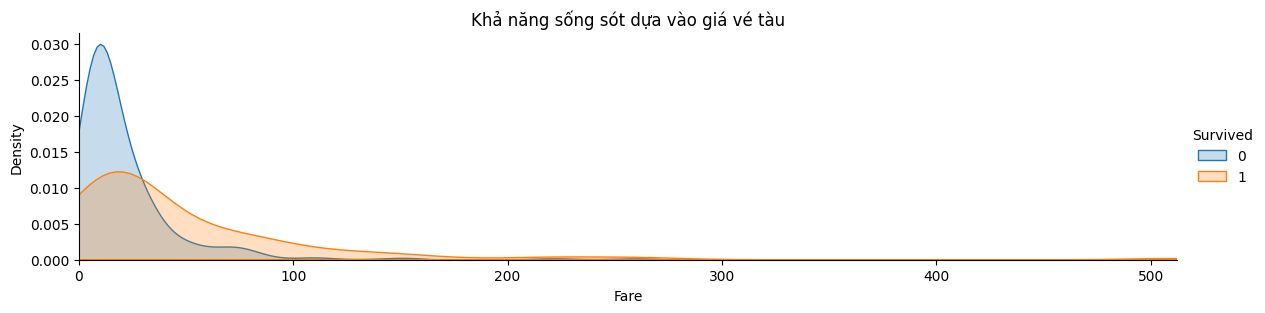

In [ ]:
facet = sns.FacetGrid(df,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',fill=True)
facet.set(xlim = (0, df['Fare'].max()),title="Khả năng sống sót dựa vào giá vé tàu")
facet.add_legend()
plt.show()

C:\Users\Keqing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Keqing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 20.0)

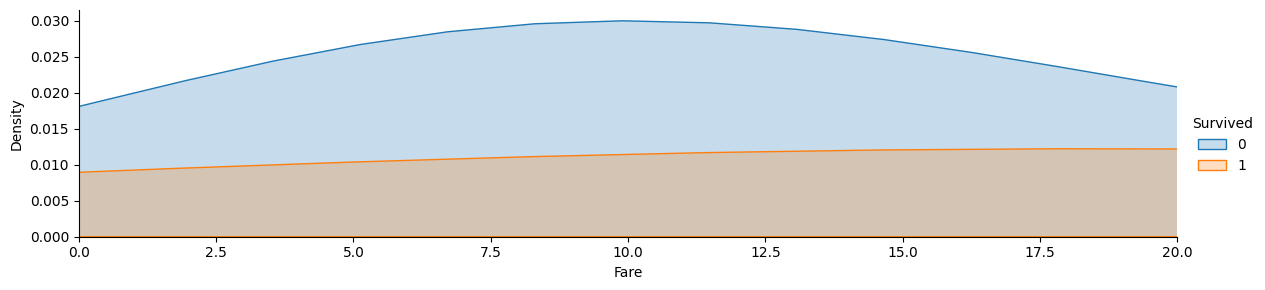

In [ ]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, df['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

C:\Users\Keqing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Keqing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(17.0, 30.0)

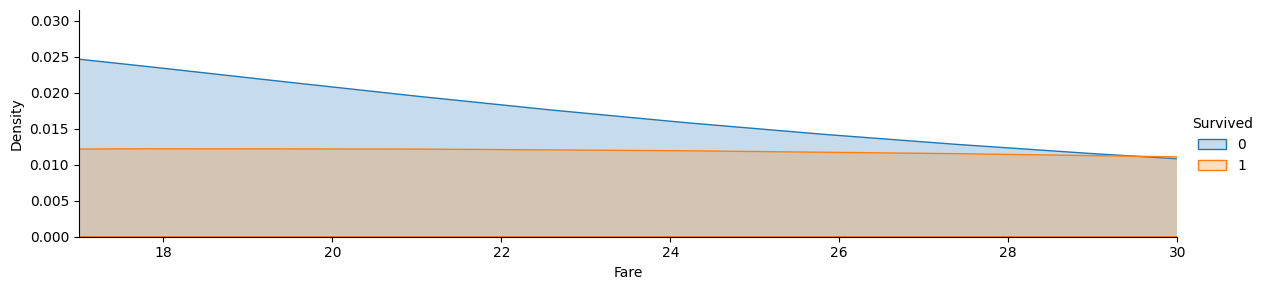

In [ ]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, df['Fare'].max()))
facet.add_legend()
plt.xlim(17, 30)

**Cũng giống như biến Age ta sẽ chuyển giá trị liên tục của fare thành các nhóm giá vé khác nhau**

- 0: dưới 17 giá trị tiền

- 1: 17-30 giá trị tiền

- 2: 30-100 giá trị tiền

- 3: hơn 100 giá trị tiền 

In [ ]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[dataset['Fare'] >= 100, 'Fare'] = 3

In [ ]:
df[['Fare','Pclass']].head(5)

,Fare,Pclass
0,0.0,3
1,2.0,1
2,0.0,3
3,2.0,1
4,0.0,3


In [ ]:
df["Fare"].fillna(df.groupby("Pclass")["Fare"].transform("median"), inplace=True)
df_test["Fare"].fillna(df_test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
display(df.isna().sum(),df_test.isna().sum())

C:\Users\trand\AppData\Local\Temp\ipykernel_5772\2622574013.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Fare"].fillna(df.groupby("Pclass")["Fare"].transform("median"), inplace=True)
C:\Users\trand\AppData\Local\Temp\ipykernel_5772\2622574013.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Survived         0
Title            0
dtype: int64

### **Thêm lại cabin**

In [ ]:
for dataset in train_test_data:
    dataset['Cabin'] =  dataset['Cabin'].str[:1]

Cabin,C,B,D,E,A,T,F,G
1st class,59.0,47.0,29.0,25.0,15.0,1.0,NaN,NaN
2nd class,NaN,NaN,4.0,4.0,NaN,NaN,8.0,NaN
3rd class,NaN,NaN,NaN,3.0,NaN,NaN,5.0,4.0


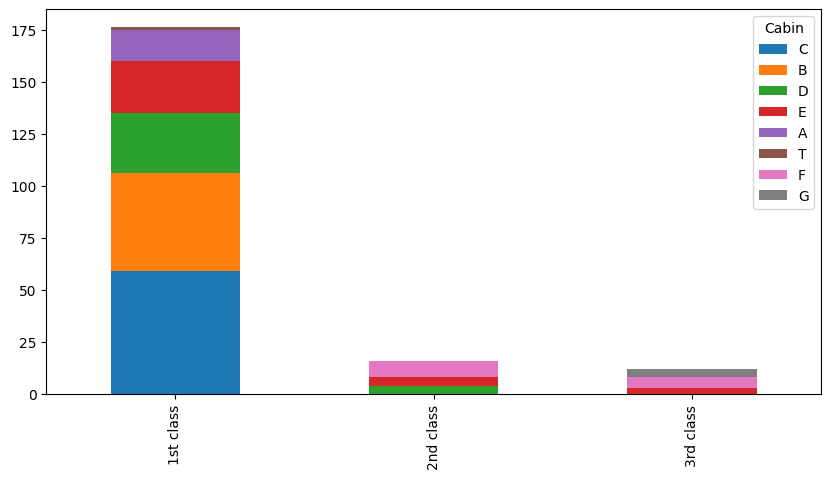

In [ ]:
Pclass1 = df[df['Pclass']==1]['Cabin'].value_counts()
Pclass2 = df[df['Pclass']==2]['Cabin'].value_counts()
Pclass3 = df[df['Pclass']==3]['Cabin'].value_counts()
temp = pd.DataFrame([Pclass1, Pclass2, Pclass3])
temp.index = ['1st class','2nd class', '3rd class']
temp.plot(kind='bar',stacked=True, figsize=(10,5))
temp.head()

In [ ]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [ ]:

# fill missing Fare with median fare for each Pclass
df["Cabin"].fillna(df.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
df_test["Cabin"].fillna(df_test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

C:\Users\trand\AppData\Local\Temp\ipykernel_5772\1569419983.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cabin"].fillna(df.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
C:\Users\trand\AppData\Local\Temp\ipykernel_5772\1569419983.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0
5,6,0,3,0,2.0,0,0,330877,0.0,2.0,2,0
6,7,0,1,0,3.0,0,0,17463,2.0,1.6,0,0
7,8,0,3,0,0.0,3,1,349909,1.0,2.0,0,3
8,9,1,3,1,2.0,0,2,347742,0.0,2.0,0,2
9,10,1,2,1,0.0,1,0,237736,2.0,1.8,1,2


## SIbsp, Parch
**Gộp biến SibSp và Parch** vì có liên quan đến nhau. Gộp theo công thức sau:

**FamilySize** = Sibsp + Parch + 1 (Cộng 1 là vì cộng chính hành khách đó)

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,2
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,1


(0.0, 11.0)

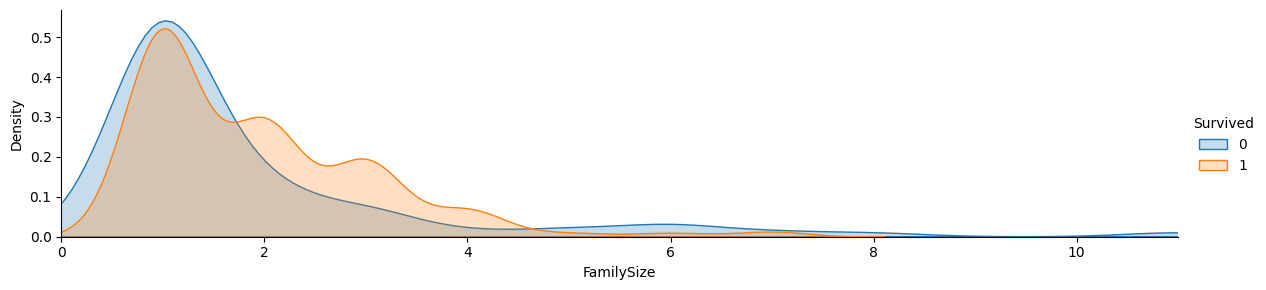

In [ ]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',fill=True)
facet.set(xlim=(0, df['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

Biểu đồ này là một bằng chứng rõ ràng cho thấy trong thảm họa Titanic, việc đi cùng gia đình vừa phải (2 đến 4 người) là yếu tố sống sót cao nhất. Biến FamilySize là một đặc trưng dự đoán mạnh mẽ cho mô hình.

In [ ]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0
5,6,0,3,0,2.0,0,0,330877,0.0,2.0,2,0,0.0
6,7,0,1,0,3.0,0,0,17463,2.0,1.6,0,0,0.0
7,8,0,3,0,0.0,3,1,349909,1.0,2.0,0,3,1.6
8,9,1,3,1,2.0,0,2,347742,0.0,2.0,0,2,0.8
9,10,1,2,1,0.0,1,0,237736,2.0,1.8,1,2,0.4


In [ ]:
features_drop = ['Ticket','SibSp','Parch']
train = df.drop(features_drop,axis=1)
test = df_test.drop(features_drop,axis=1)
train = train.drop(['PassengerId'], axis=1)

*Có 177 giá trị NaN trong Age và 687 giá trị NaN trong Cabin*

In [ ]:
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,2.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,2.0,0.8,0,2,0.4
4,0,3,0,2.0,0.0,2.0,0,0,0.0
5,0,3,0,2.0,0.0,2.0,2,0,0.0
6,0,1,0,3.0,2.0,1.6,0,0,0.0
7,0,3,0,0.0,1.0,2.0,0,3,1.6
8,1,3,1,2.0,0.0,2.0,0,2,0.8
9,1,2,1,0.0,2.0,1.8,1,2,0.4


In [ ]:
test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,,0,0.0
1,893,3,1,3.0,0.0,2.0,0,,2,0.4
2,894,2,0,3.0,0.0,2.0,2,,0,0.0
3,895,3,0,2.0,0.0,2.0,0,,0,0.0
4,896,3,1,1.0,0.0,2.0,0,,2,0.8
5,897,3,0,0.0,0.0,2.0,0,,0,0.0
6,898,3,1,2.0,0.0,2.0,2,,1,0.0
7,899,2,0,1.0,1.0,2.0,0,,0,0.8
8,900,3,1,1.0,0.0,2.0,1,,2,0.0
9,901,3,0,1.0,1.0,2.0,0,,0,0.8
